<a href="https://colab.research.google.com/github/naveenchintalapudi/WebTechnologies/blob/main/Brain_tumor_detection_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow


In [ ]:
pip install sequential


  Preparing metadata (setup.py) ... done
  Created wheel for sequential: filename=sequential-1.0.0-py3-none-any.whl size=2858 sha256=75cdce443d9a385db7d447d222e1484a2351299042547c8eb225845dc22a99c5
  Stored in directory: /root/.cache/pip/wheels/c3/61/56/fe456787532527aafb108ffeceecb4a2e928a518c88bbdd5c5
Successfully built sequential


In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [ ]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [ ]:
import os
tr_df = train_df("/content/drive/MyDrive/DDSM/archive (4)/brain tumor dataset/Testing")

In [ ]:
tr_df

,Class Path,Class
0,/content/drive/MyDrive/DDSM/archive (4)/brain ...,pituitary_tumor
1,/content/drive/MyDrive/DDSM/archive (4)/brain ...,pituitary_tumor
2,/content/drive/MyDrive/DDSM/archive (4)/brain ...,pituitary_tumor
3,/content/drive/MyDrive/DDSM/archive (4)/brain ...,pituitary_tumor
4,/content/drive/MyDrive/DDSM/archive (4)/brain ...,pituitary_tumor
...,...,...
389,/content/drive/MyDrive/DDSM/archive (4)/brain ...,no_tumor
390,/content/drive/MyDrive/DDSM/archive (4)/brain ...,no_tumor
391,/content/drive/MyDrive/DDSM/archive (4)/brain ...,no_tumor
392,/content/drive/MyDrive/DDSM/archive (4)/brain ...,no_tumor


In [ ]:
ts_df = test_df('/content/drive/MyDrive/DDSM/archive (4)/brain tumor dataset/Testing')

In [ ]:
ts_df

,Class Path,Class
0,/content/drive/MyDrive/DDSM/archive (4)/brain ...,pituitary_tumor
1,/content/drive/MyDrive/DDSM/archive (4)/brain ...,pituitary_tumor
2,/content/drive/MyDrive/DDSM/archive (4)/brain ...,pituitary_tumor
3,/content/drive/MyDrive/DDSM/archive (4)/brain ...,pituitary_tumor
4,/content/drive/MyDrive/DDSM/archive (4)/brain ...,pituitary_tumor
...,...,...
389,/content/drive/MyDrive/DDSM/archive (4)/brain ...,no_tumor
390,/content/drive/MyDrive/DDSM/archive (4)/brain ...,no_tumor
391,/content/drive/MyDrive/DDSM/archive (4)/brain ...,no_tumor
392,/content/drive/MyDrive/DDSM/archive (4)/brain ...,no_tumor


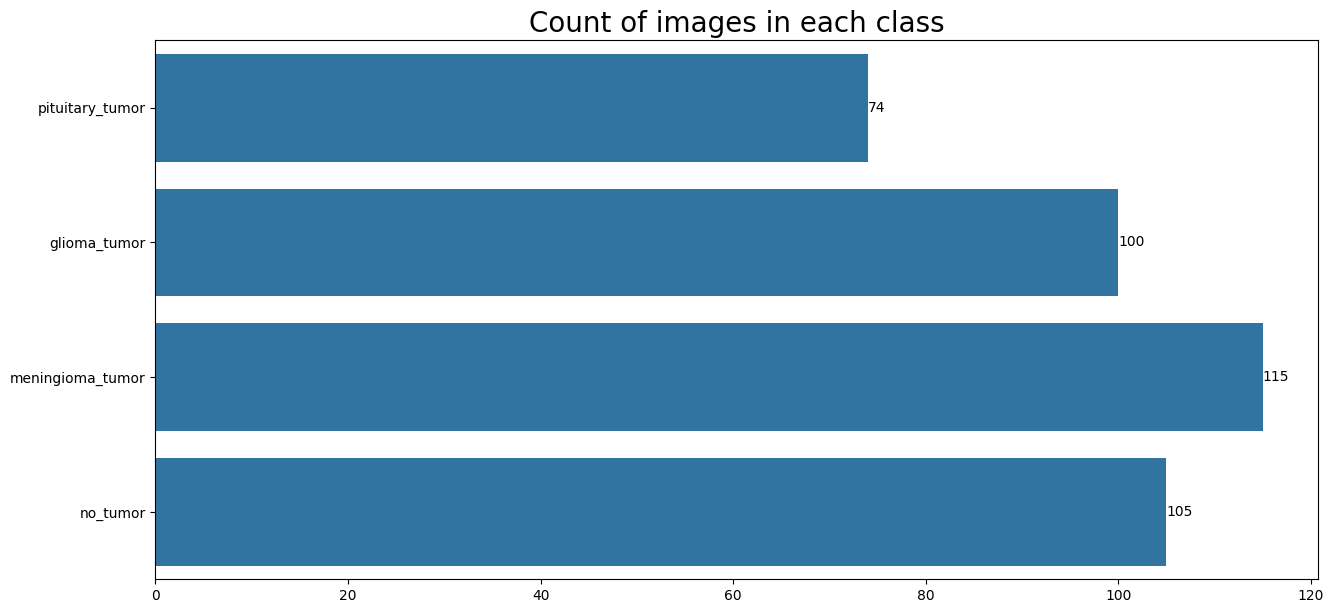

In [ ]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

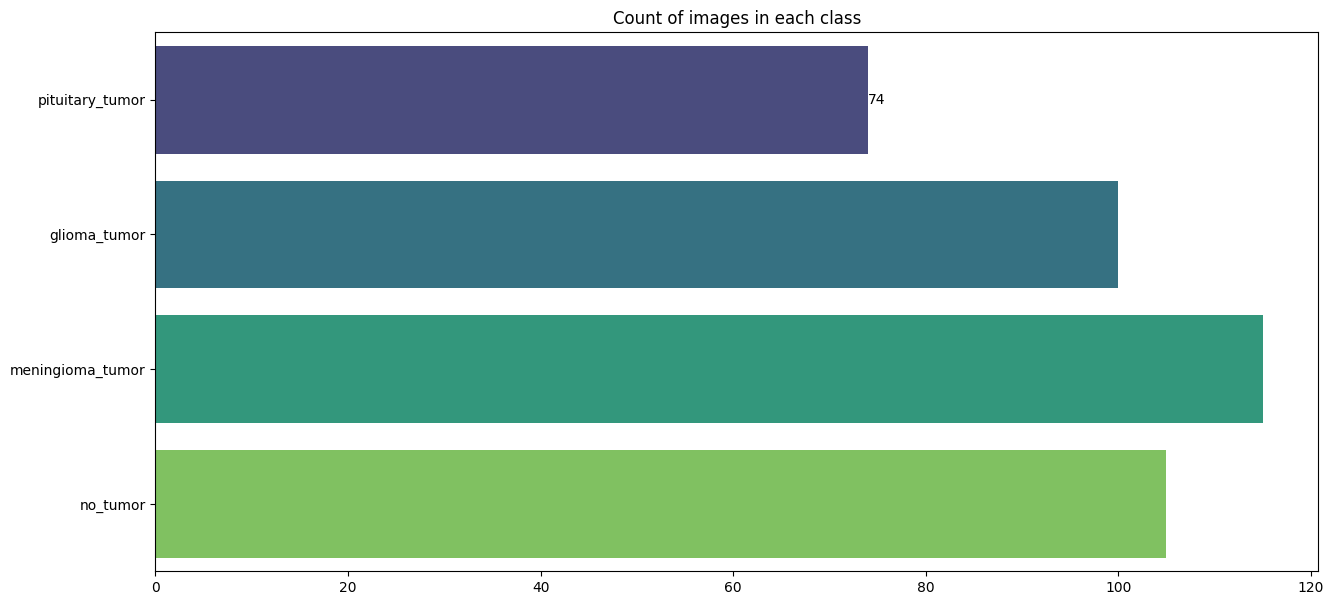

In [ ]:
#Count each class in test data
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=ts_df['Class'], palette='viridis')

ax.set(xlabel='', ylabel='', title='Count of images in each class')
ax.bar_label(ax.containers[0])

plt.show()

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
350,/content/drive/MyDrive/DDSM/archive (4)/brain ...,no_tumor
49,/content/drive/MyDrive/DDSM/archive (4)/brain ...,pituitary_tumor
104,/content/drive/MyDrive/DDSM/archive (4)/brain ...,glioma_tumor
34,/content/drive/MyDrive/DDSM/archive (4)/brain ...,pituitary_tumor
334,/content/drive/MyDrive/DDSM/archive (4)/brain ...,no_tumor
...,...,...
112,/content/drive/MyDrive/DDSM/archive (4)/brain ...,glioma_tumor
56,/content/drive/MyDrive/DDSM/archive (4)/brain ...,pituitary_tumor
19,/content/drive/MyDrive/DDSM/archive (4)/brain ...,pituitary_tumor
175,/content/drive/MyDrive/DDSM/archive (4)/brain ...,meningioma_tumor


In [ ]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                      target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 394 validated image filenames belonging to 4 classes.
Found 197 validated image filenames belonging to 4 classes.
Found 197 validated image filenames belonging to 4 classes.


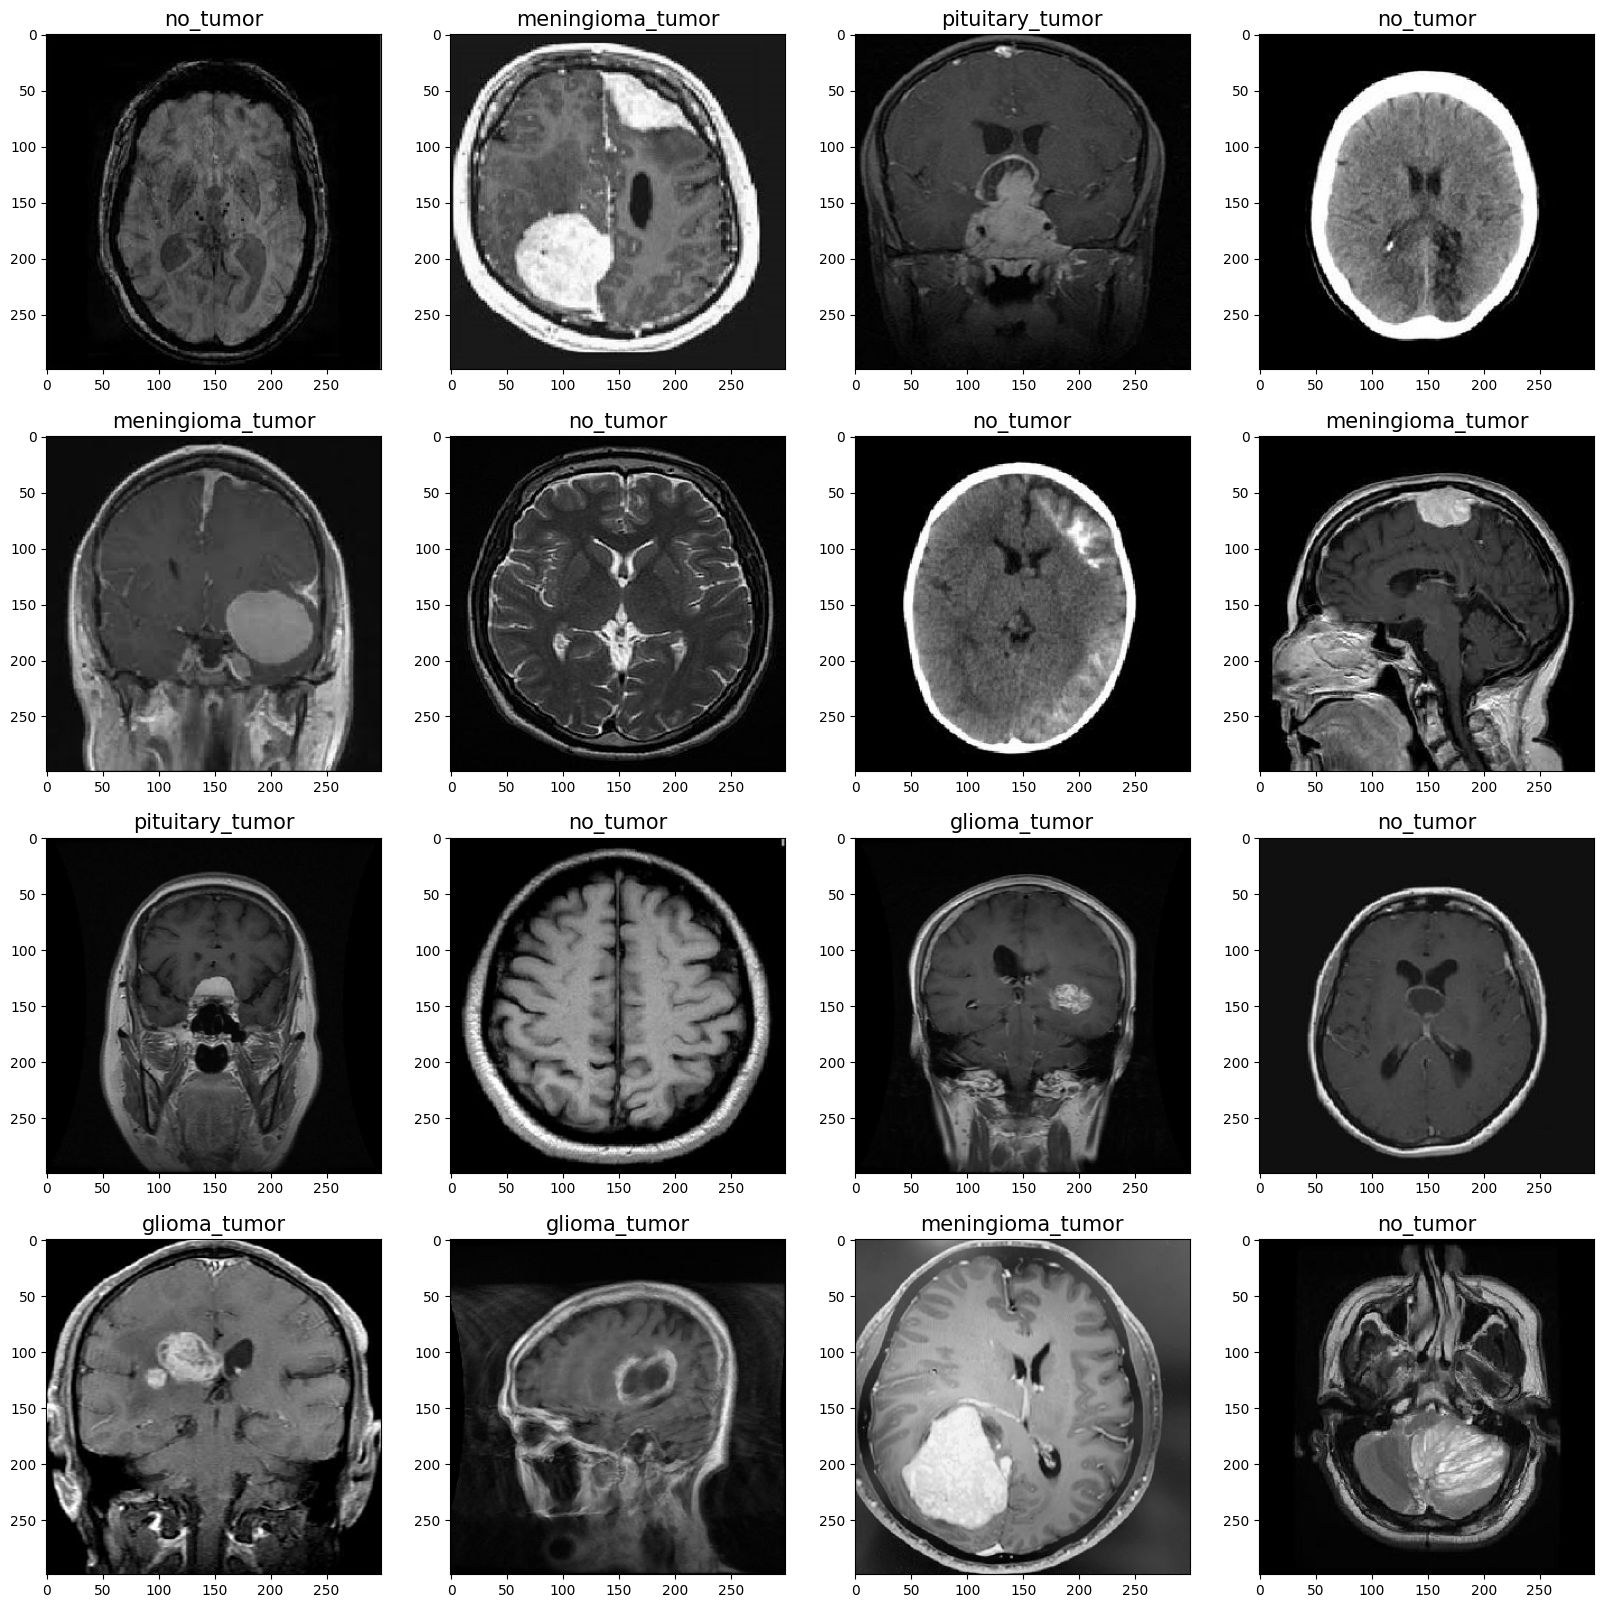

In [ ]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall

# Define the input shape for the ANN
input_shape = (299 * 299 * 3,)  # Flattened input shape

# Define your ANN model
model_ann = Sequential([
    Flatten(input_shape=input_shape),  # Flatten layer to convert 3D image data to 1D
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

# Compile the ANN model
model_ann.compile(Adamax(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy', Precision(), Recall()])

# Display the model summary
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 268203)            0         
                                                                 
 dropout (Dropout)           (None, 268203)            0         
                                                                 
 dense (Dense)               (None, 128)               34330112  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 34330628 (130.96 MB)
Trainable params: 34330628 (130.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = model_ann.fit(tr_gen,
                 epochs=10,
                 validation_data=valid_gen,
                 shuffle= False)

Epoch 1/10
13/13 [==============================] - 17s 1s/step - loss: 7.3159 - accuracy: 0.4569 - precision: 0.4627 - recall: 0.4569 - val_loss: 3.0424 - val_accuracy: 0.4772 - val_precision: 0.4868 - val_recall: 0.4670
Epoch 3/10
13/13 [==============================] - 28s 2s/step - loss: 1.9837 - accuracy: 0.3959 - precision: 0.4683 - recall: 0.2995 - val_loss: 1.1701 - val_accuracy: 0.3299 - val_precision: 0.8571 - val_recall: 0.1523
Epoch 4/10
13/13 [==============================] - 17s 1s/step - loss: 1.2201 - accuracy: 0.3426 - precision: 0.8814 - recall: 0.1320 - val_loss: 1.1438 - val_accuracy: 0.5381 - val_precision: 0.9143 - val_recall: 0.1624
Epoch 5/10
13/13 [==============================] - 17s 1s/step - loss: 1.1348 - accuracy: 0.4619 - precision: 0.7250 - recall: 0.2208 - val_loss: 0.9991 - val_accuracy: 0.5431 - val_precision: 0.8261 - val_recall: 0.2893
Epoch 6/10
13/13 [==============================] - 17s 1s/step - loss: 1.0719 - accuracy: 0.4949 - precision: 0

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

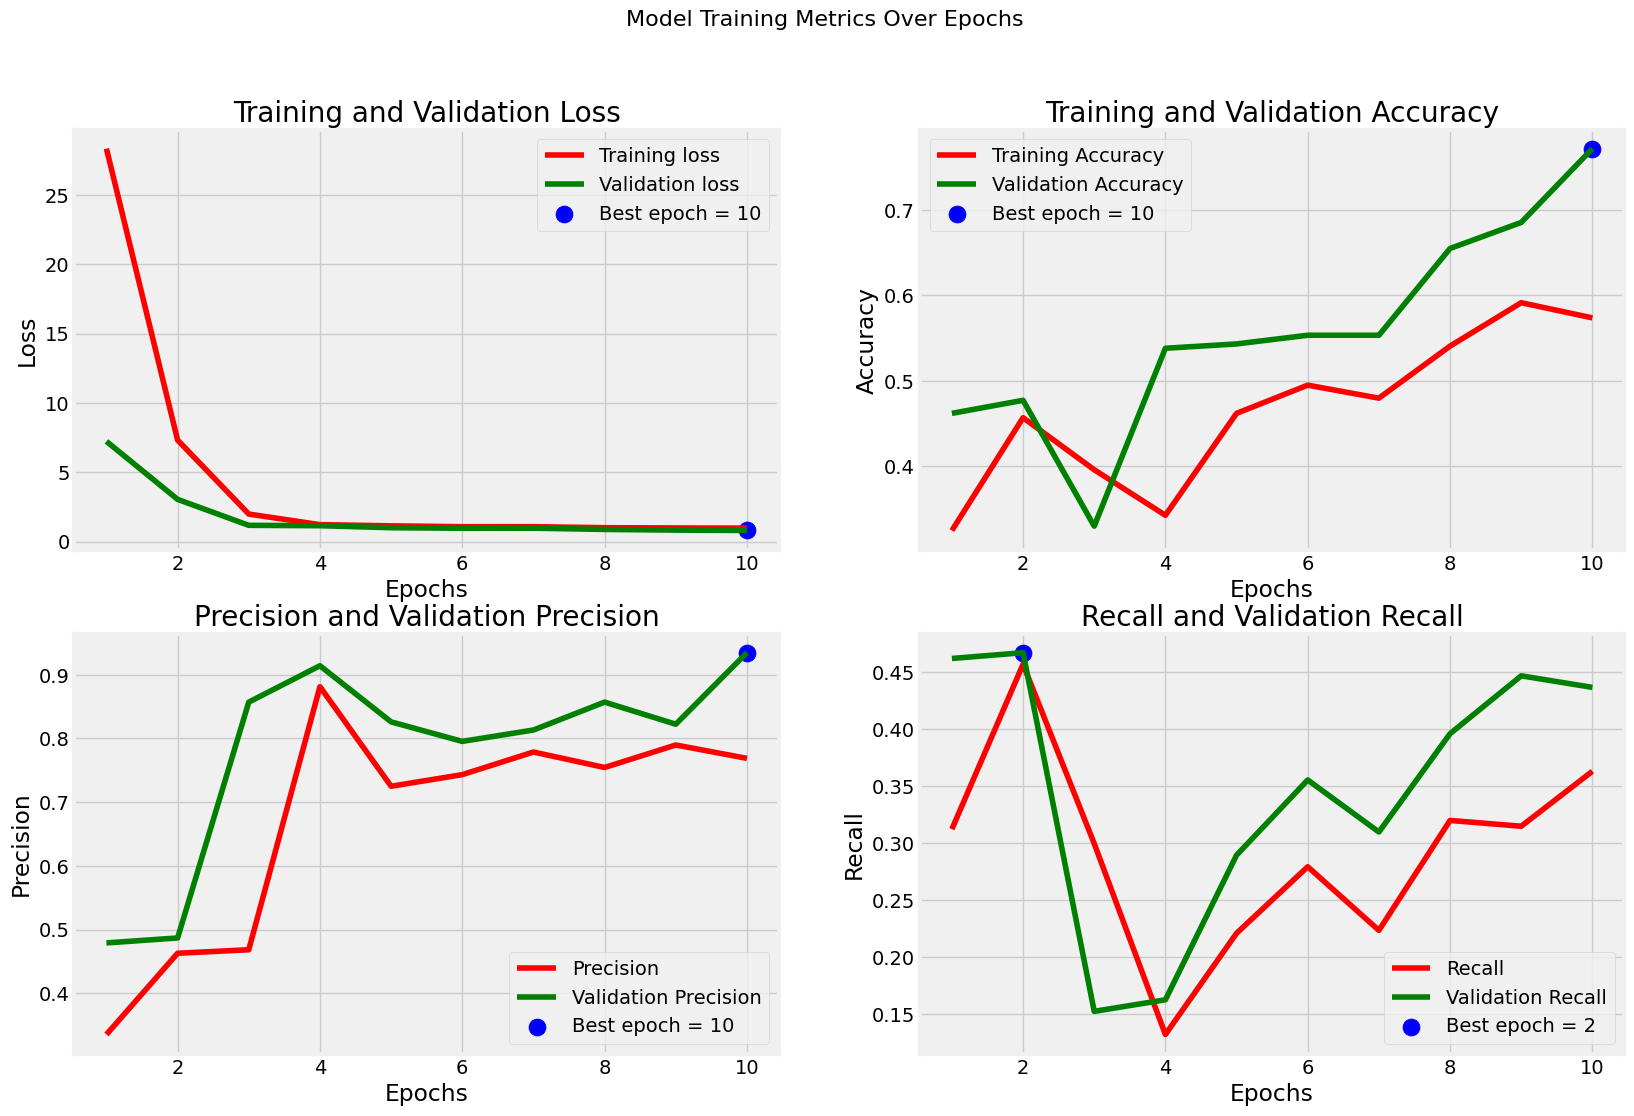

In [ ]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'

plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [ ]:
train_score = model_ann.evaluate(tr_gen, verbose=1)
valid_score = model_ann.evaluate(valid_gen, verbose=1)
test_score = model_ann.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")


13/13 [==============================] - 2s 127ms/step - loss: 0.8283 - accuracy: 0.7817 - precision: 0.9620 - recall: 0.3858
Train Loss: 0.8135
Train Accuracy: 77.41%
--------------------
Validation Loss: 0.8078
Validation Accuracy: 77.16%
--------------------
Test Loss: 0.8283
Test Accuracy: 78.17%


In [ ]:
preds = model_ann.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

13/13 [==============================] - 2s 167ms/step


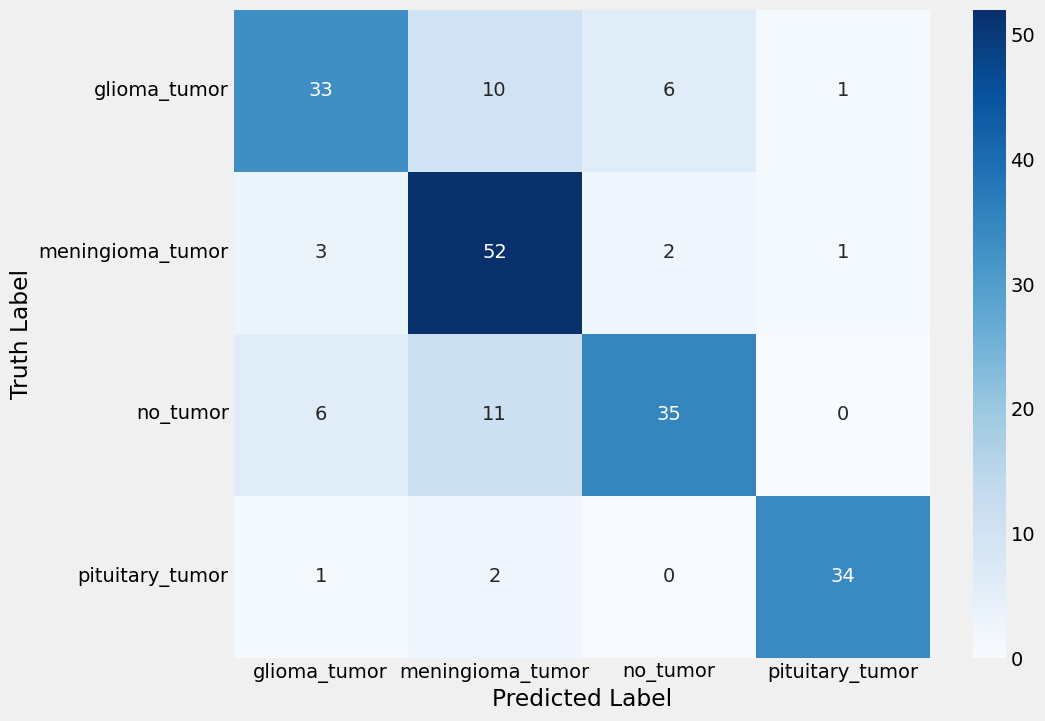

In [ ]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.77      0.66      0.71        50
           1       0.69      0.90      0.78        58
           2       0.81      0.67      0.74        52
           3       0.94      0.92      0.93        37

    accuracy                           0.78       197
   macro avg       0.80      0.79      0.79       197
weighted avg       0.79      0.78      0.78       197



In [ ]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    img_flat = img.reshape((img.shape[0], -1))  # Flatten the input image
    predictions = model_ann.predict(img_flat)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')
    plt.show()

1/1 [==============================] - 0s 111ms/step


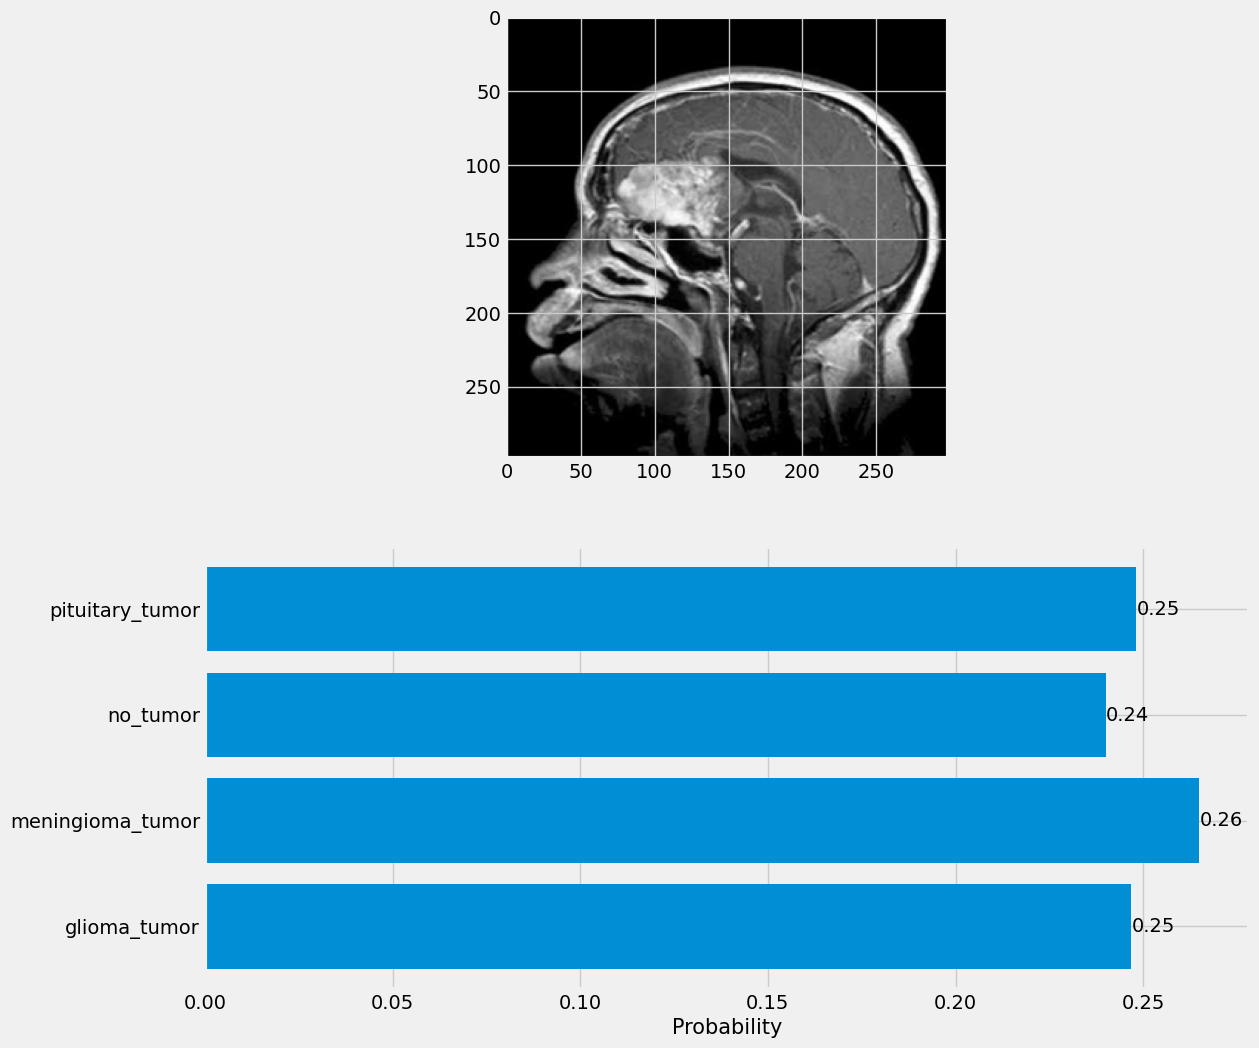

In [ ]:
predict('/content/drive/MyDrive/DDSM/archive (4)/brain tumor dataset/Testing/glioma_tumor/image(10).jpg')

1/1 [==============================] - 0s 107ms/step


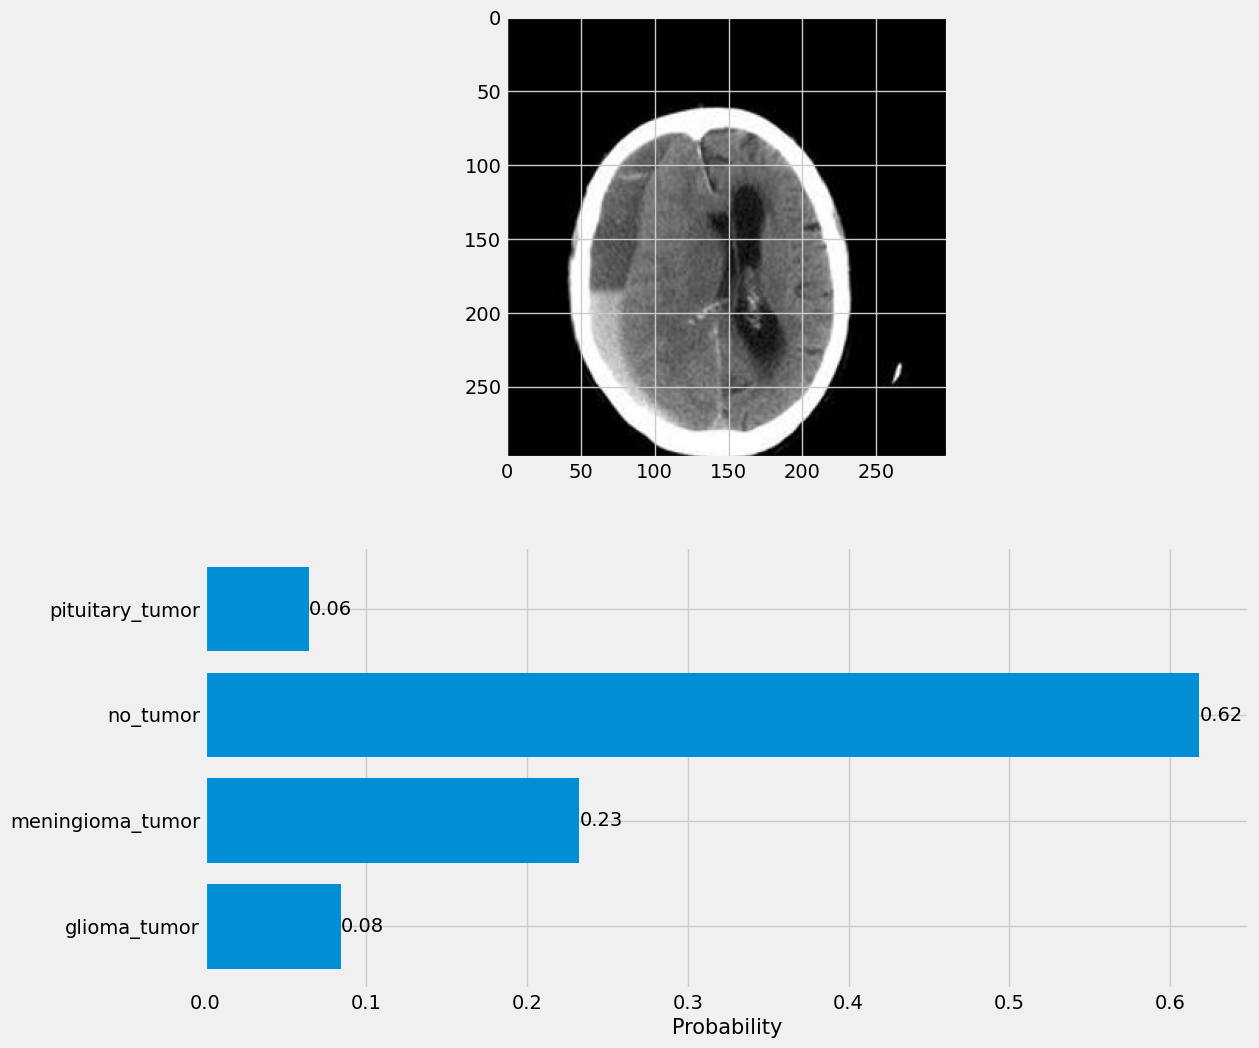

In [ ]:
predict("/content/drive/MyDrive/DDSM/archive (4)/brain tumor dataset/Testing/no_tumor/image(1).jpg")

1/1 [==============================] - 0s 37ms/step


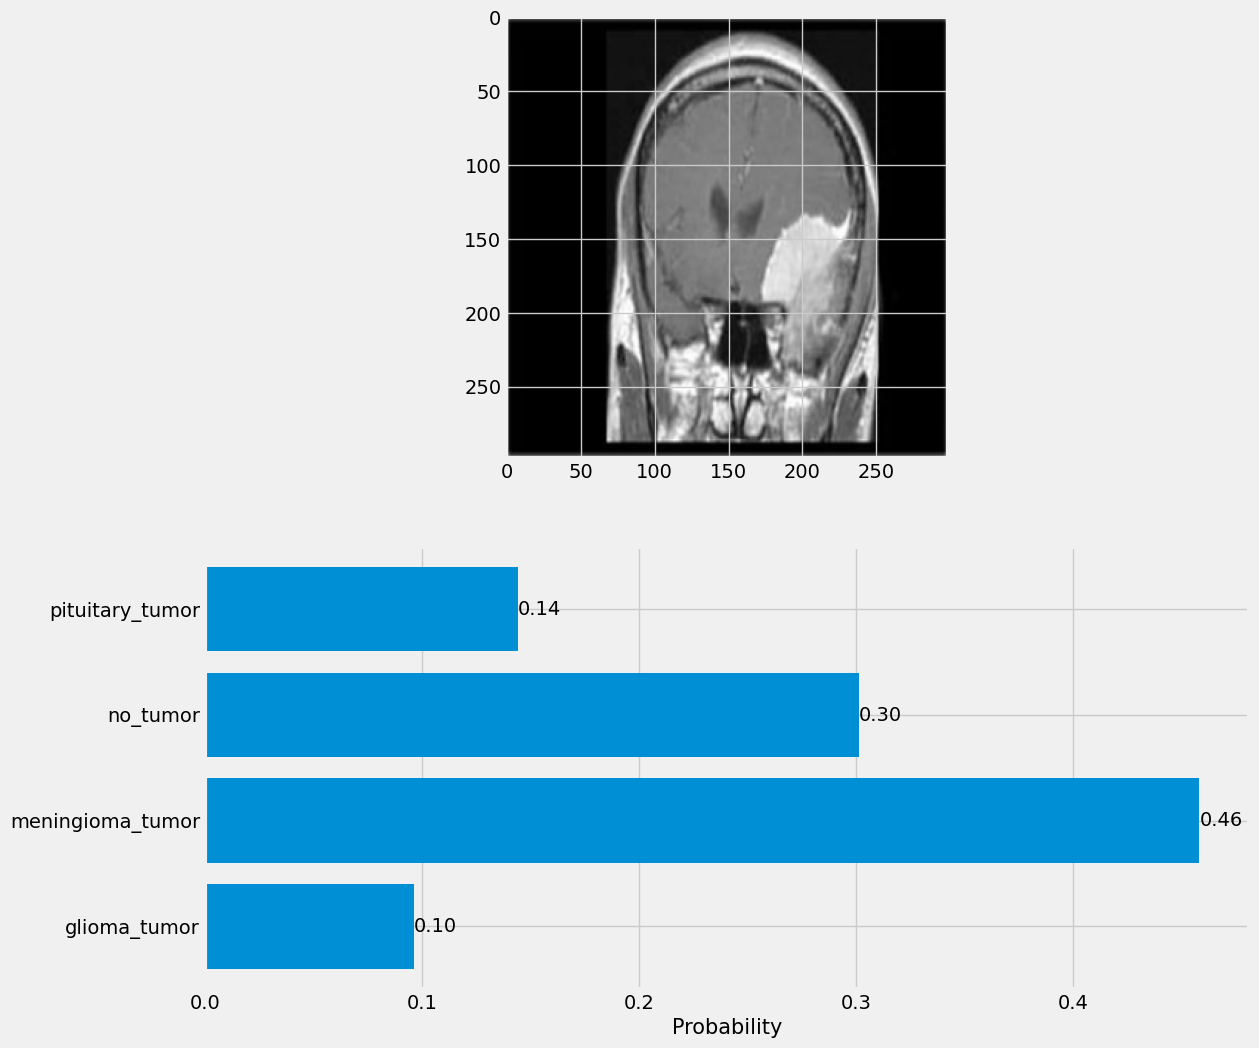

In [ ]:
predict("/content/drive/MyDrive/DDSM/archive (4)/brain tumor dataset/Testing/meningioma_tumor/image(1).jpg")